In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt
import imageio

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
import trackpy as tp

from pandas import DataFrame, Series  # for convenience
from sxmreader import SXMReader

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/pySPM/utils/misc.py:135: UserWarning: the library tqdm cannot be found. All progressbar will be disabled.
  warn("the library tqdm cannot be found. All progressbar will be disabled.")


Frame 24: 4 features
0


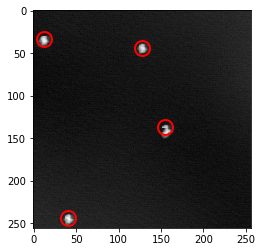

1


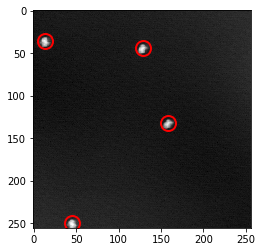

2


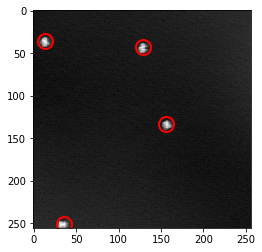

3


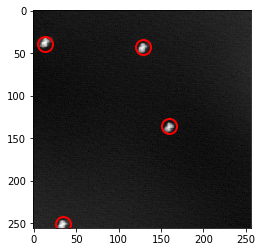

4


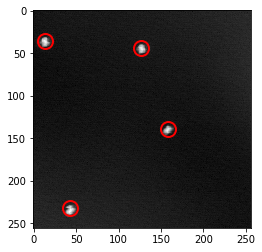

5


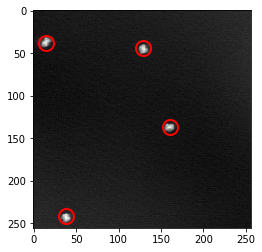

6


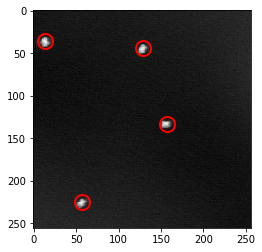

7


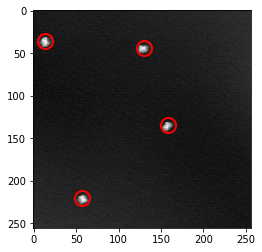

8


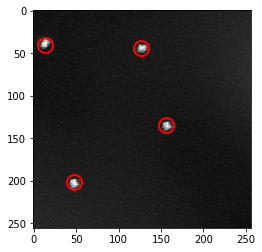

9


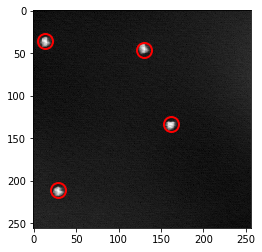

10


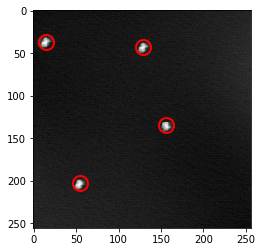

11


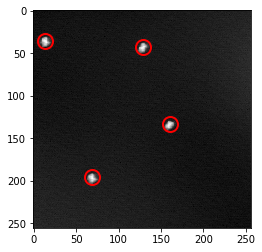

12


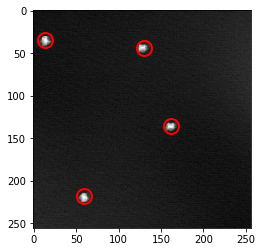

13


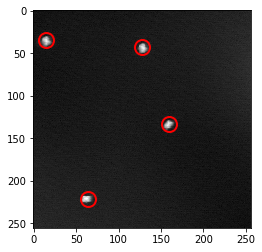

14


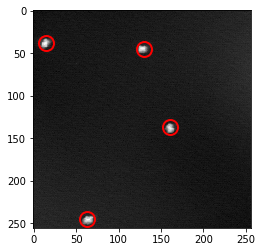

15


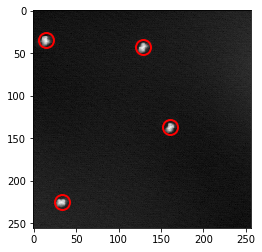

16


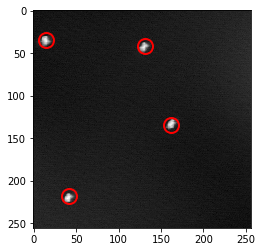

17


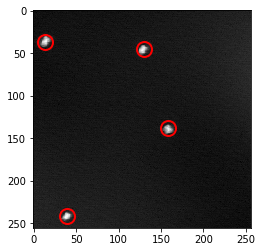

18


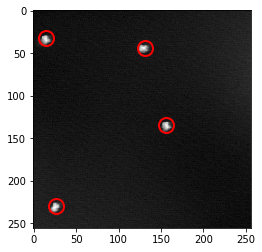

19


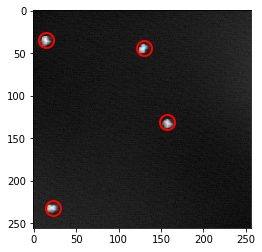

20


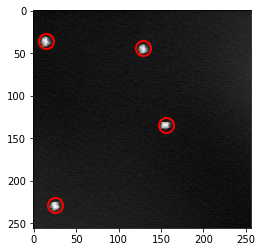

21


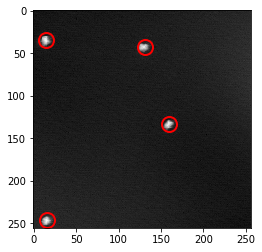

22


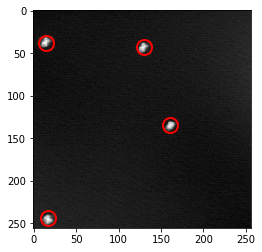

23


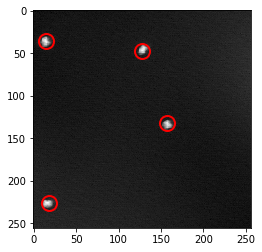

24


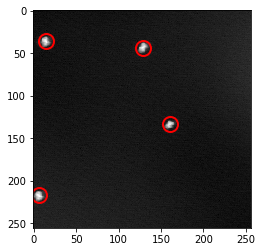

In [2]:
if True:
    frames = SXMReader("single_molecule/*.sxm")
    molecule_size = 9
    min_mass = 2.0
    min_size = 1.5
    max_ecc = 0.3

f = tp.batch(frames[:], molecule_size, minmass=1)
plt.figure()

for i,frame in enumerate(frames):
    print(i)
    tp.annotate(f[f['frame']==i], frame)

Frame 24: 4 trajectories present.


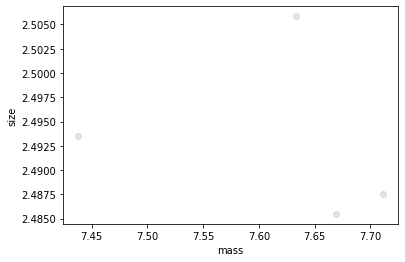

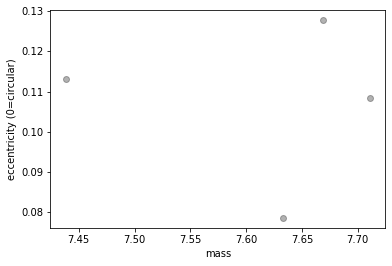

In [3]:
t = tp.link(f, search_range=50, adaptive_stop=5, memory=3)
plt.figure()
tp.mass_size(t.groupby('particle').mean()); # convenience function -- just plots size vs. mass
tp.mass_ecc(t.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [4]:
t1 = t[((t['mass'] > min_mass) & (t['size'] > min_size) &
         (t['ecc'] < max_ecc))]
t2 = tp.filter_stubs(t, 1)

# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t2['particle'].nunique())

Before: 4
After: 4


In [5]:
d = tp.compute_drift(t2)
t3 = tp.subtract_drift(t2.copy(), d)
print(d)

               y         x
frame                     
1       1.257066  2.497475
2       1.320030 -0.461219
3       2.810725  0.044137
4      -1.572193  1.453127
5       1.030945  1.569137
6      -4.713445  5.012858
7      -5.485583  5.620222
8      -9.298985  1.929459
9      -7.697721 -0.444430
10    -10.063716  4.432738
11    -12.340748  8.844423
12     -6.146543  7.141312
13     -6.223139  7.484870
14      1.976771  8.009826
15     -4.635862  0.594445
16     -7.121179  3.039115
17      1.187948  1.065746
18     -3.853267 -2.297638
19     -3.981047 -3.062388
20     -3.655731 -3.009401
21     -0.088654 -4.177254
22      0.463825 -3.636975
23     -4.016661 -4.714541
24     -6.922096 -6.797436


In [12]:
t3

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,33.529091,12.133223,7.098370,2.454916,0.018536,0.255776,33.654784,0.015590,0,0
0,43.293048,127.369166,7.290789,2.487982,0.038975,0.247563,33.272089,0.015806,0,1
0,136.274407,155.105328,3.809654,1.994372,0.422508,0.299187,18.119325,0.035123,0,2
0,243.594916,41.027831,7.293135,2.447026,0.016669,0.265162,35.210024,0.014768,0,3
1,34.196223,10.625140,7.266240,2.454136,0.036827,0.262835,34.368849,0.014730,1,0
...,...,...,...,...,...,...,...,...,...,...
23,230.143048,22.347964,7.668228,2.495924,0.189444,0.264601,35.201656,0.012633,23,3
24,140.246791,166.916296,8.231416,2.460130,0.131299,0.284805,32.367639,0.014076,24,2
24,42.161226,20.850937,7.911988,2.523604,0.063215,0.255766,36.075358,0.012369,24,0


In [9]:
single_molecule = tp.emsd(t3[t3.particle == 0], frames.meters_per_pixel*1e6, 1) # microns per pixel = 100/285., frames per second = 24

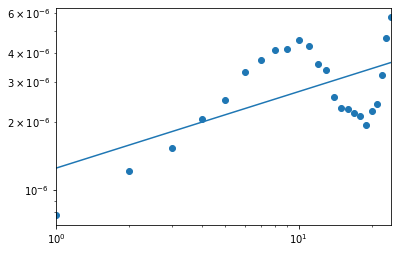

,n,A
msd,0.335802,0.000001


In [10]:
import seaborn as sns
tp.utils.fit_powerlaw(single_molecule, plot=True)  # performs linear best fit in log space, plots]

In [13]:
single_molecule

lagt
1.0     7.787217e-07
2.0     1.212920e-06
3.0     1.537428e-06
4.0     2.065992e-06
5.0     2.492309e-06
6.0     3.311806e-06
7.0     3.752228e-06
8.0     4.146636e-06
9.0     4.167824e-06
10.0    4.570913e-06
11.0    4.300644e-06
12.0    3.583138e-06
13.0    3.391291e-06
14.0    2.575999e-06
15.0    2.294260e-06
16.0    2.268644e-06
17.0    2.191301e-06
18.0    2.123979e-06
19.0    1.933672e-06
20.0    2.228090e-06
21.0    2.396439e-06
22.0    3.224186e-06
23.0    4.671682e-06
24.0    5.741588e-06
Name: msd, dtype: float64

No handles with labels found to put in legend.


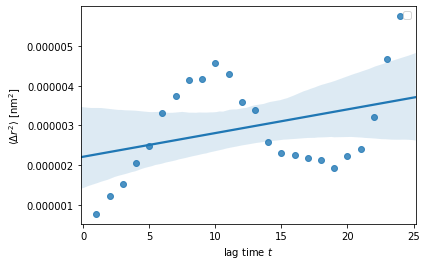

In [14]:
# em40 = em40.reset_index()
# em50 = em50.reset_index()
single_molecule = single_molecule.reset_index()
fig, ax = plt.subplots()
sns.regplot(single_molecule.lagt, single_molecule.msd)
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [nm$^2$]',
       xlabel='lag time $t$')
ax.legend()